### Working with parameters and literal segments

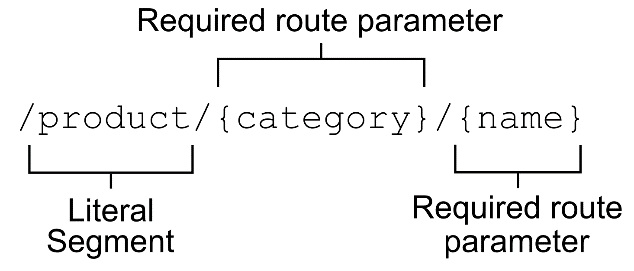

The ***routing middleware*** `parses` a ***route template*** by `splitting` it into `segments`.  
  
A ***segment*** is typically separated by the `/` character, but it `can be any valid
character`.  
  
***Segments*** that use a character `other than /` are called `complex segments`.

Each `segment` is either
- A `literal` value such as `product` 
- A `route parameter` such as `{category}` and `{name}`

`Literal segments` in ASP.NET Core `aren’t` ***case-sensitive***.

`Route values` are the values `extracted from a URL` based on a given route
template. Each route parameter in a template has an associated route value,
and the `values are stored as a string` pair in a `dictionary`.

### Using optional and default values

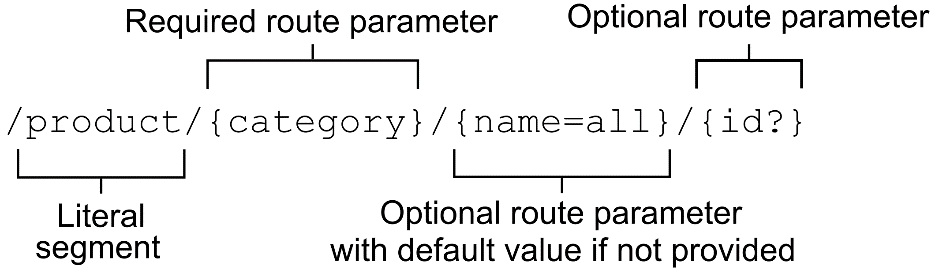

following two URLs are equivalent:
- /product/shoes
- /product/shoes/all

### Adding additional constraints to route parameters

"/{category}/{name=all}/{id?}", all of the following URLs would match:
- /shoes/sneakers/test
- /shoes/sneakers/123
- /Account/ChangePassword
- /ShoppingCart/Checkout/Start
- /1/2/3

the `router` passes `route values` to `handlers` through `model binding`

In [ ]:
app.MapGet("/fruit/{id}", (int id) => "Hello world!");

If the `id` route parameter ends up assigned a `noninteger` value from the URL, you’ll get an `exception` when it’s bound to the integer id parameter.

`To avoid this problem`, it’s possible to `add more constraints` to a **route template** that must be satisfied for a URL to be considered a match.

You can ***define constraints*** in a route template for a given ***route parameter*** by using `:` (colon)

In [ ]:
app.MapGet("/fruit/{id:int}", (int id) => "Hello world!");

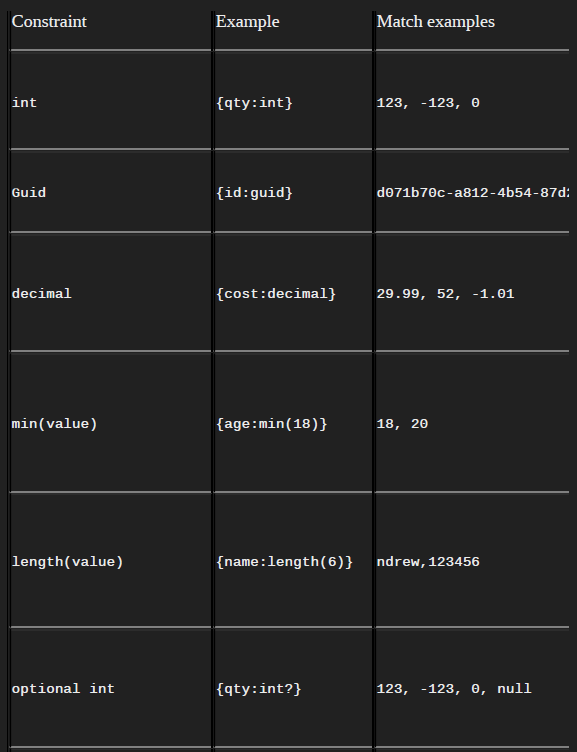

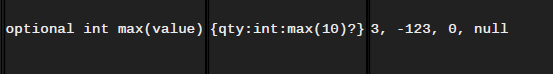

you can also `combine multiple constraints` by ***separating*** the constraints with `colons`.

When the ***routing middleware*** `matches` a **URL to a route template**, it interrogates the `constraints` to check that ***they’re all valid***.  
If `they aren’t valid`, the **route template** `isn’t considered a match`, and the endpoint won’t be executed.

***Route constraints*** are most useful when you have `overlapping route templates`.

Suppose that you have an endpoint with the route template
`/{number}/{name}` and another with the template `/{product}/{id}`.
When a request with the URL `/shoes/123` arrives, ***which template is chosen***?
Both match, so the ***routing middleware*** panics and `throws an exception`—not
ideal.

Using constraints can fix this problem. `/{number:int}/{name}`

### Matching arbitrary URLs with the catch-all parameter

Imagine that you’re building a `currency-converter` application that shows the `exchange rate` from `one currency` to `one or more` other currencies.

- `/USD/convert/GBP` : Show USD with exchange rate to GBP.
- `/USD/convert/GBP/EUR` : Show USD with exchange rates to GBP and EUR
- `/USD/convert/GBP/EUR/CAD` : Show USD with exchange rates for GBP, EUR, and CAD.



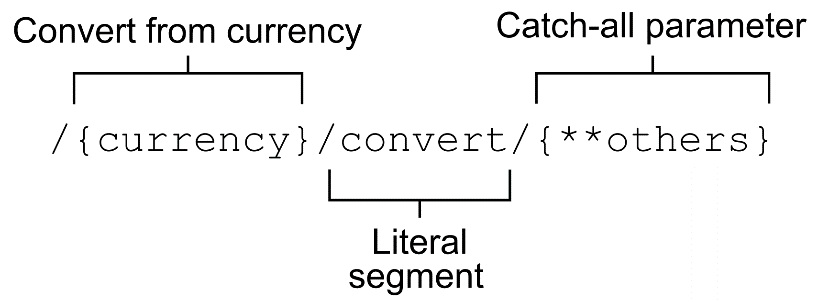

You can declare `catch-all parameters` by using either one or two asterisks
inside the parameter definition, as in `{*others}` and `{**others}`.

<div dir="rtl" style="margin:auto; width:90%; font-family:vazirmatn;">
<ul><li><p>*<em>یک ستاره (مثل {<em>others}):</em></em> این نوع پارامتر همه‌گیر، بخش باقی‌مانده از URL که با هیچ یک از پارامترهای قبلی مطابقت نداشته است را، شامل می‌شود. این بخش می‌تواند شامل اسلش‌ها (/) و کاراکترهای دیگر باشد.</p></li><li><p>**دو ستاره (مثل {<strong>others}):</strong> این نوع پارامتر نیز مانند پارامتر یک ستاره عمل می‌کند و بخش باقی‌مانده از URL را که با پارامترهای قبلی مطابقت ندارد، شامل می‌شود.</p></li></ul>

<h5>تفاوت در تولید URL:</h5>
<ul><li><p><strong>یک ستاره:</strong> در زمان تولید URL، نسخه یک ستاره اسلش‌های رو به جلو (/) را URL-encode می‌کند. یعنی اسلش‌ها به صورت کدگذاری شده (مثل %2F) در URL قرار می‌گیرند.</p></li><li><p><strong>دو ستاره:</strong> در زمان تولید URL، نسخه دو ستاره اسلش‌های رو به جلو (/) را URL-encode نمی‌کند. یعنی اسلش‌ها به صورت عادی در URL قرار می‌گیرند.</p></li></ul>

<h5>انتخاب نسخه مناسب:</h5>
<ul><li><strong>رفتار دو ستاره:</strong> معمولاً رفتار نسخه دو ستاره برای تولید URLها مناسب‌تر است، زیرا URLهای تولید شده به شکل طبیعی‌تر و خواناتر خواهند بود.</li></ul>

</div>

In [ ]:
app.MapControllerRoute(
    name: "default",
    pattern: "{controller=Home}/{action=Index}/{*others}"
);

var url = Url.Action("Index", "Home", new { others = "some/path/here" });

// /Home/Index/some%2Fpath%2Fhere  output

In [ ]:
app.MapControllerRoute(
    name: "default",
    pattern: "{controller=Home}/{action=Index}/{**others}"
);

var url = Url.Action("Index", "Home", new { others = "some/path/here" });

// /Home/Index/some/path/here   output
